In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
current_palette = sns.color_palette()

In [2]:
dataset_original = pd.read_csv('breast_ori.csv', header = None)

label_dataset = dataset_original.iloc[-1]

# We start by second column and remove last row
dataset_original = dataset_original.iloc[:-1, 1:]

for i in xrange(dataset_original.shape[1]):
    
    # Change to number first
    dataset_original.iloc[:, i] = pd.to_numeric(dataset_original.iloc[:, i], errors='coerce')
    # Find the lowest value without NaN
    low = np.nanmin(dataset_original.iloc[:, i].values)
    # Find the highest value without NaN
    high = np.nanmax(dataset_original.iloc[:, i].values)
    # Replace Na without (low + high) / 2.0
    dataset_original.iloc[:, i] = dataset_original.iloc[:, i].fillna((low + high) / 2.0)

Yah, it should be zero, that means, we replaced all NaN values with proper value. Now let's do visualization. Here we will compare your data with Miss Ong data, is it your data still reliable to correlate with the experiment?

We will use principal component for our first visualization. We will use library to do principal component, later i will do the component analysis

In [3]:
dataset_clone = pd.read_csv('training_data.csv', header = None)

# We start by second column
dataset_clone = dataset_clone.iloc[:, 1:]

for i in xrange(dataset_clone.shape[1]):
    
    # Change to number first
    dataset_clone.iloc[:, i] = pd.to_numeric(dataset_clone.iloc[:, i], errors='coerce')
    # Find the lowest value without NaN
    low = np.nanmin(dataset_clone.iloc[:, i].values)
    # Find the highest value without NaN
    high = np.nanmax(dataset_clone.iloc[:, i].values)
    # Replace Na without (low + high) / 2.0
    dataset_clone.iloc[:, i] = dataset_clone.iloc[:, i].fillna((low + high) / 2.0)

In [4]:
from sklearn.preprocessing import LabelEncoder

label_dataset = label_dataset.iloc[1:].values

print "got : " + str(label_dataset.shape[0]) + " data"

label = np.unique(label_dataset)

label_dataset = LabelEncoder().fit_transform(label_dataset)

got : 97 data


Transpose the data and combine train and test data set for clone data

In [5]:
dataset_original = dataset_original.iloc[:, :].values.T
dataset_clone = dataset_clone.iloc[:, :].values.T

dataset_clone_prime = pd.read_csv('test_data.csv')

# We start by second column
dataset_clone_prime = dataset_clone_prime.iloc[:, 1:].values.T

dataset_clone = np.concatenate((dataset_clone, dataset_clone_prime), axis = 0)

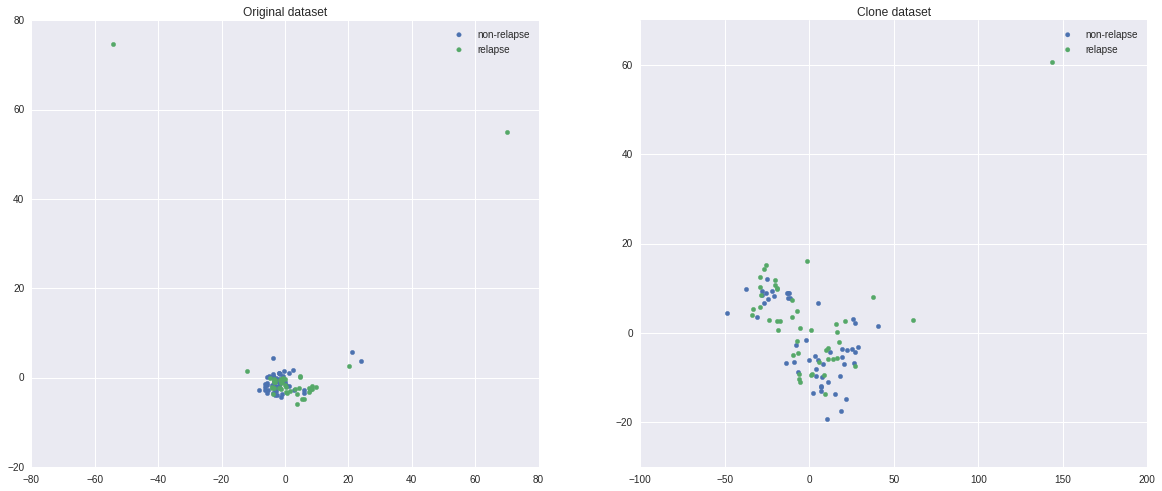

In [6]:
from sklearn.decomposition import PCA

X_original = PCA(n_components = 2).fit_transform(dataset_original)
X_clone = PCA(n_components = 2).fit_transform(dataset_clone)

fig = plt.figure(figsize = (20,8))

plt.subplot(1, 2, 1)

for no, _ in enumerate(np.unique(label_dataset)):
    plt.scatter(X_original[label_dataset == no, 0], X_original[label_dataset == no, 1], color = current_palette[no], label = label[no])
    
plt.legend()
plt.title('Original dataset')
plt.subplot(1,2, 2)

for no, _ in enumerate(np.unique(label_dataset)):
    plt.scatter(X_clone[label_dataset == no, 0], X_clone[label_dataset == no, 1], color = current_palette[no], label = label[no])
    
plt.legend()
plt.title('Clone dataset')
plt.savefig('principalcomponent.pdf')
plt.show()

Does clone data already clean? Let we standardize and normalize the original data

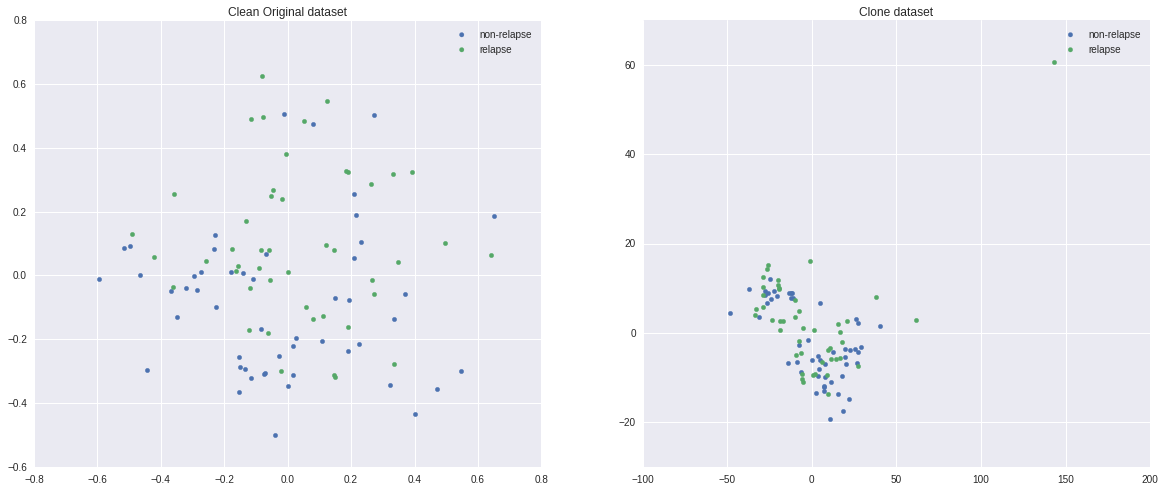

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

X_original = StandardScaler().fit_transform(dataset_original)
X_original = Normalizer().fit_transform(X_original)

X_original = PCA(n_components = 2).fit_transform(X_original)

fig = plt.figure(figsize = (20,8))

plt.subplot(1, 2, 1)

for no, _ in enumerate(np.unique(label_dataset)):
    plt.scatter(X_original[label_dataset == no, 0], X_original[label_dataset == no, 1], color = current_palette[no], label = label[no])
    
plt.legend()
plt.title('Clean Original dataset')
plt.subplot(1,2, 2)

for no, _ in enumerate(np.unique(label_dataset)):
    plt.scatter(X_clone[label_dataset == no, 0], X_clone[label_dataset == no, 1], color = current_palette[no], label = label[no])
    
plt.legend()
plt.title('Clone dataset')
plt.savefig('principalcomponent_clean.pdf')
plt.show()

Below I will try to visualize using t-Distributed Stochastic Neighbor Embedding (t-SNE)
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/2cc3ef3b4d237787cd82e5ef638d96d642a1e43d)

If you understand the equation, basically if an element has high value, probability of that element related to its population is high, and it will scattered on high value hypothesis plane.
exponent equation, totally logistic

But we need to take sample only, else we got memory error

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 97 but corresponding boolean dimension is 48
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 97 but corresponding boolean dimension is 48


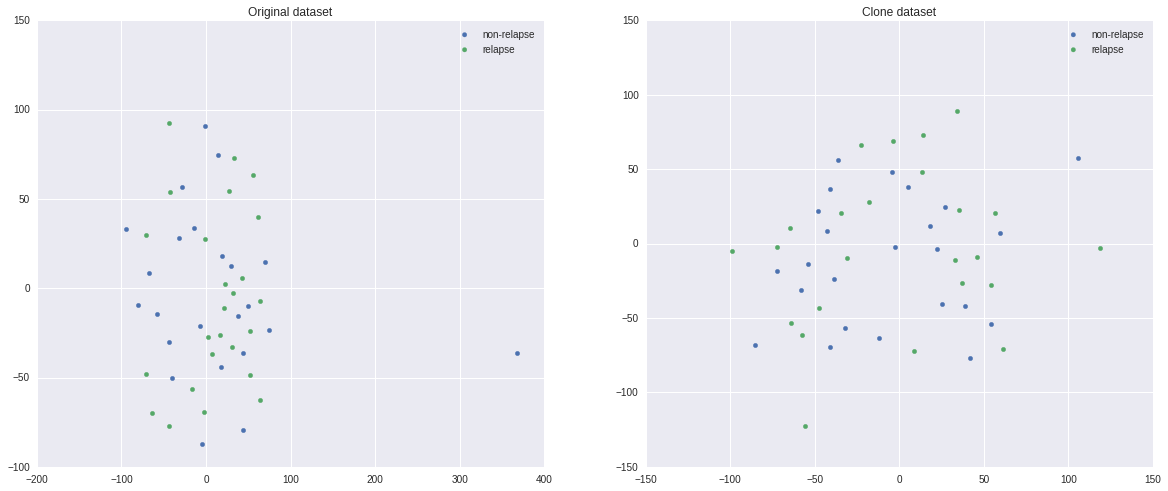

In [9]:
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

X_original, _, label_sample, _ = train_test_split(dataset_original, label_dataset, test_size = 0.5)
X_clone, _, label_sample_prime, _ = train_test_split(dataset_clone, label_dataset, test_size = 0.5)

X_original = TSNE(n_components = 2).fit_transform(dataset_original)
X_clone = TSNE(n_components = 2).fit_transform(dataset_clone)

fig = plt.figure(figsize = (20,8))

plt.subplot(1, 2, 1)

for no, _ in enumerate(np.unique(label_dataset)):
    plt.scatter(X_original[label_sample == no, 0], X_original[label_sample == no, 1], color = current_palette[no], label = label[no])
    
plt.legend()
plt.title('Original dataset')
plt.subplot(1,2, 2)

for no, _ in enumerate(np.unique(label_dataset)):
    plt.scatter(X_clone[label_sample_prime == no, 0], X_clone[label_sample_prime == no, 1], color = current_palette[no], label = label[no])
    
plt.legend()
plt.title('Clone dataset')
plt.savefig('tsne.pdf')
plt.show()

Now we plot heatmap using Pearson Correlation

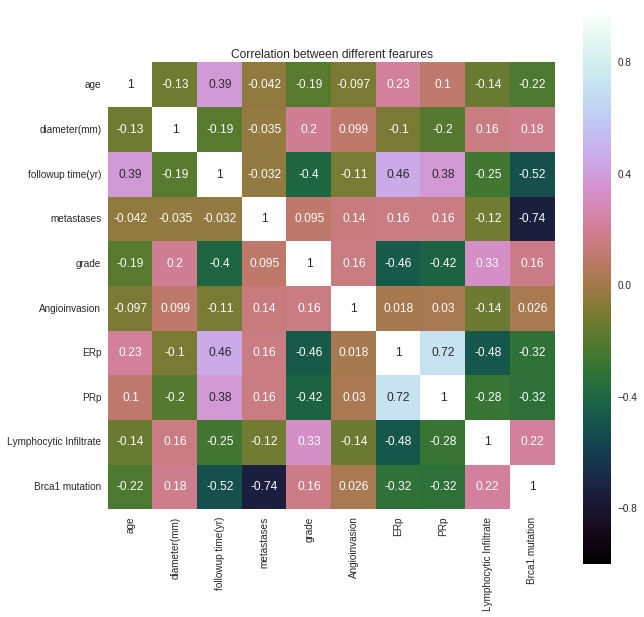

In [22]:
clinical_data = pd.read_csv('clinical.csv')
clinical_data = clinical_data.iloc[:, 1:]

correlation = clinical_data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation, vmax = 1, square = True, annot = True, cmap = 'cubehelix')

plt.title('Correlation between different fearures')
plt.savefig('heatmap_pearson.pdf')
plt.show()